In [ ]:
主成分分析 (Principal Component Analysis : PCA ) は、データの要約 （少ないデータ数で元のデータを表現すること）の強力な手法のひとつです。
主成分分析の実用例として、製品やサービスのスコアリングや比較（1次元に圧縮）、データの可視化（2,3次元に圧縮）、回帰分析の前処理、などがあげられます。
主成分分析は実用性が高く、機械学習の分野において重要なテーマの一つとなっています。
主成分分析は教師あり学習の前処理として使われることはありますが、主成分分析自体は教師あり学習に分類されません。

In [ ]:
主成分分析を使って、以下の手順で　データの圧縮（特徴変換） 行います。
　少し難しい内容になっていますが問題ありません。次のセッションから詳しく見ていきます。

データを標準化します。
特徴同士の相関行列を計算します。
相関行列の固有ベクトルと固有値を求めます。
得られた固有値を大きい方からk個選び、対応する固有ベクトルを選択します。このkの値は、圧縮したい次元数を指定してください。
k個の固有ベクトルから特徴変換行列 W を作成します。
d次元のデータ X と行列 W で行列の積をとり、k次元に変換されたデータ X'を得ます。

主成分分析を適切に適応させることにより、特徴量を欲しい次元に要約したデータを得ることができます。

In [ ]:
実際に主成分分析を行っていきましょう。用いるデータは、　「UCI Machine Learning Repository」　で公開されているワインのデータです。　178行分のワインサンプルに対して、ぶどうの種類データ（1〜3のラベル）とワインの化学的性質を表す特徴量データ（13種類）で構成されています。

In [4]:
import pandas as pd
df_wine = pd.read_csv("http://archive.ics.uci.edu/ml/machine-learning-databases/wine/wine.data", header = None)
# 特徴量データをXに、ラベルデータをyに格納。
# df_wineの1列目はラベルデータ、2列目以降は特徴量データです。
X, y = df_wine.iloc[:, 1:].values, df_wine.iloc[:, 0].values
print(X.shape)
print(X)
print(y.shape)
print(y)

(178, 13)
[[  1.42300000e+01   1.71000000e+00   2.43000000e+00 ...,   1.04000000e+00
    3.92000000e+00   1.06500000e+03]
 [  1.32000000e+01   1.78000000e+00   2.14000000e+00 ...,   1.05000000e+00
    3.40000000e+00   1.05000000e+03]
 [  1.31600000e+01   2.36000000e+00   2.67000000e+00 ...,   1.03000000e+00
    3.17000000e+00   1.18500000e+03]
 ..., 
 [  1.32700000e+01   4.28000000e+00   2.26000000e+00 ...,   5.90000000e-01
    1.56000000e+00   8.35000000e+02]
 [  1.31700000e+01   2.59000000e+00   2.37000000e+00 ...,   6.00000000e-01
    1.62000000e+00   8.40000000e+02]
 [  1.41300000e+01   4.10000000e+00   2.74000000e+00 ...,   6.10000000e-01
    1.60000000e+00   5.60000000e+02]]
(178,)
[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3
 3 

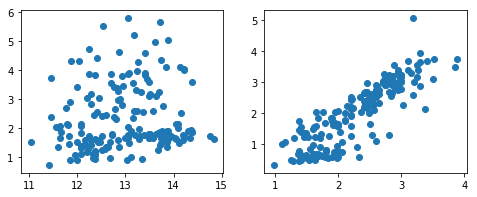

before
mean:  [  1.30006180e+01   2.33634831e+00   2.36651685e+00   1.94949438e+01
   9.97415730e+01   2.29511236e+00   2.02926966e+00   3.61853933e-01
   1.59089888e+00   5.05808988e+00   9.57449438e-01   2.61168539e+00
   7.46893258e+02] 
std:  [  8.09542915e-01   1.11400363e+00   2.73572294e-01   3.33016976e+00
   1.42423077e+01   6.24090564e-01   9.96048950e-01   1.24103260e-01
   5.70748849e-01   2.31176466e+00   2.27928607e-01   7.07993265e-01
   3.14021657e+02]


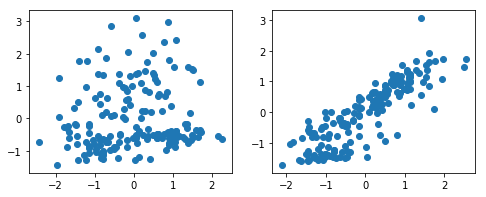

after
mean:  [ -8.38280756e-16  -1.19754394e-16  -8.37033314e-16  -3.99181312e-17
  -3.99181312e-17   0.00000000e+00  -3.99181312e-16   3.59263181e-16
  -1.19754394e-16   3.49283648e-17   1.99590656e-16   3.19345050e-16
  -1.59672525e-16] 
std:  [ 1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.]


In [10]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

df_wine = pd.read_csv("http://archive.ics.uci.edu/ml/machine-learning-databases/wine/wine.data", header = None)
X, y = df_wine.iloc[:, 1:].values, df_wine.iloc[:, 0].values

# 標準化前のデータを可視化
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(8,3))
ax1.scatter(X[:, 0], X[:, 1])
ax2.scatter(X[:, 5], X[:, 6])
plt.show()

print("before")
print("mean: ", X.mean(axis=0), "\nstd: ", X.std(axis=0))

# Xに、Xを標準化したデータを代入してください。
X = (X - X.mean(axis=0)) / X.std(axis=0)

# 標準化後のデータを可視化
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(8,3))
ax1.scatter(X[:, 0], X[:, 1])
ax2.scatter(X[:, 5], X[:, 6])
plt.show()


print("after")
print("mean: ", X.mean(axis=0), "\nstd: ", X.std(axis=0))

In [ ]:
特徴量ごとの類似度を調べるため、データの 相関行列 を計算します。

相関係数は、2つのデータ間の直線的な関係性の強さを表す指標で -1〜1の値をとります。
相関係数が1に近い（正の相関が強い）ときは、左の図のように二つのデータは片方が増加するともう片方も増加する ような一次関数的な分布をとります。
負の相関が強い ときは 片方が増加するともう片方は減少する ような一次関数的な分布をとります。
相関係数が0に近い ときは、右の図のように 直線的な関係性があまり見られません。

In [24]:
# 相関行列（13x13）を作成
R = np.corrcoef(X.T)
print(R)
#---------------------------
# 対角成分を0にしています。
_R = R - np.identity(13)
# 最大相関係数をとるインデックスを1つだけ取得しています。
index = np.where(_R == _R.max())[0]
#---------------------------

print(R[index[0], index[1]])
print(index)

[[ 1.          0.09439694  0.2115446  -0.31023514  0.27079823  0.28910112
   0.23681493 -0.15592947  0.13669791  0.5463642  -0.0717472   0.07234319
   0.64372004]
 [ 0.09439694  1.          0.16404547  0.2885004  -0.0545751  -0.335167
  -0.41100659  0.29297713 -0.22074619  0.24898534 -0.56129569 -0.36871043
  -0.19201056]
 [ 0.2115446   0.16404547  1.          0.44336719  0.28658669  0.12897954
   0.11507728  0.18623045  0.00965194  0.25888726 -0.07466689  0.00391123
   0.22362626]
 [-0.31023514  0.2885004   0.44336719  1.         -0.08333309 -0.32111332
  -0.35136986  0.36192172 -0.19732684  0.01873198 -0.27395522 -0.27676855
  -0.44059693]
 [ 0.27079823 -0.0545751   0.28658669 -0.08333309  1.          0.21440123
   0.19578377 -0.25629405  0.23644061  0.19995001  0.0553982   0.06600394
   0.39335085]
 [ 0.28910112 -0.335167    0.12897954 -0.32111332  0.21440123  1.
   0.8645635  -0.4499353   0.61241308 -0.05513642  0.43368134  0.69994936
   0.49811488]
 [ 0.23681493 -0.41100659  0.115

In [22]:
x = np.array([[1,2,3], [4,5,6]])
print(x)
print(x.T)

[[1 2 3]
 [4 5 6]]
[[1 4]
 [2 5]
 [3 6]]


In [ ]:
固有値分解
次に、得られた相関行列に 固有値分解 という数学的手法を適用し、固有ベクトルと固有値を取得します。
固有値分解を行うと、もとの13x13次元の行列 {R}R は13個の特別な13次元ベクトル （固有ベクトル） v_1 〜 v13 と
13個の特別な数 （固有値） λ1 〜 λ13に分解されます。
直感的には、元の行列は 固有ベクトルの方向に情報が集中しており、対応する固有値は情報の集中の度合いを示している と言えます。

numpyを使って以下のように固有値分解を計算できます。 {R}R の固有値13個と固有ベクトル13個がそれぞれ、 eigvals と eigvecs に格納されます。

import numpy as np
# 相関行列から固有対を取得。 numpy.linalg.eighはそれらを固有値の昇順で返す
eigvals, eigvecs = np.linalg.eigh(R)

numpy.linalg.eigh は、小さい固有値から順に格納されたものをひとつ目の返り値として出力します。


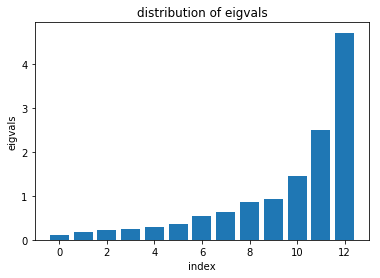

[ 0.10337794  0.16877023  0.22578864  0.25090248  0.28887994  0.34849736
  0.55102831  0.64165703  0.85322818  0.91897392  1.44607197  2.49697373
  4.70585025]


In [25]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

df_wine = pd.read_csv("http://archive.ics.uci.edu/ml/machine-learning-databases/wine/wine.data", header = None)
X, y = df_wine.iloc[:, 1:].values, df_wine.iloc[:, 0].values

# 相関行列（13x13）を作成
R = np.corrcoef(X.T)

# 固有値分解
eigvals, eigvecs = np.linalg.eigh(R)

# 可視化
plt.bar(range(13), eigvals)
plt.title("distribution of eigvals")
plt.xlabel("index")
plt.ylabel("eigvals")
plt.show()

print(eigvals) # 消さないでください。実行結果の確認に使います。

eigvals (13,) [ 0.10337794  0.16877023  0.22578864  0.25090248  0.28887994  0.34849736
  0.55102831  0.64165703  0.85322818  0.91897392  1.44607197  2.49697373
  4.70585025]
eigvecs (13, 13) [[ 0.01496997  0.26628645  0.22591696  0.21160473  0.50861912 -0.39613926
   0.05639636 -0.21353865 -0.26566365 -0.0178563   0.20738262  0.48365155
  -0.1443294 ]
 [ 0.02596375 -0.12169604 -0.07648554 -0.30907994 -0.07528304 -0.06582674
  -0.42052391 -0.53681385  0.03521363  0.53689028 -0.08901289  0.22493093
   0.24518758]
 [-0.14121803  0.04962237  0.49869142 -0.02712539 -0.30769445  0.17026002
   0.14917061 -0.15447466 -0.14302547 -0.21417556 -0.6262239   0.31606881
   0.00205106]
 [ 0.09168285  0.05574287 -0.47931378  0.05279942  0.20044931 -0.42797018
   0.28696914  0.10082451  0.06610294  0.06085941 -0.61208035 -0.0105905
   0.23932041]
 [ 0.05677422 -0.06222011 -0.07128891  0.06787022  0.27140257  0.15636143
  -0.3228833  -0.03814394  0.72704851 -0.35179658 -0.13075693  0.299634
  -0.1419920

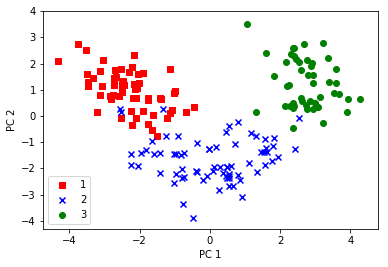

X_pca (178, 2) [[-3.31675081  1.44346263]
 [-2.20946492 -0.33339289]
 [-2.51674015  1.0311513 ]
 [-3.75706561  2.75637191]
 [-1.00890849  0.86983082]
 [-3.05025392  2.12240111]
 [-2.44908967  1.17485013]
 [-2.05943687  1.60896307]
 [-2.5108743   0.91807096]
 [-2.75362819  0.78943767]
 [-3.47973668  1.30233324]
 [-1.7547529   0.61197723]
 [-2.11346234  0.67570634]
 [-3.45815682  1.13062988]
 [-4.31278391  2.09597558]
 [-2.3051882   1.66255173]
 [-2.17195527  2.32730534]
 [-1.89897118  1.63136888]
 [-3.54198508  2.51834367]
 [-2.0845222   1.06113799]
 [-3.12440254  0.78689711]
 [-1.08657007  0.24174355]
 [-2.53522408 -0.09184062]
 [-1.64498834 -0.51627893]
 [-1.76157587 -0.31714893]
 [-0.9900791   0.94066734]
 [-1.77527763  0.68617513]
 [-1.23542396 -0.08980704]
 [-2.18840633  0.68956962]
 [-2.25610898  0.19146194]
 [-2.50022003  1.24083383]
 [-2.67741105  1.47187365]
 [-1.62857912  0.05270445]
 [-1.90269086  1.63306043]
 [-1.41038853  0.69793432]
 [-1.90382623  0.17671095]
 [-1.38486223

In [28]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

df_wine = pd.read_csv("http://archive.ics.uci.edu/ml/machine-learning-databases/wine/wine.data", header = None)
X, y = df_wine.iloc[:, 1:].values, df_wine.iloc[:, 0].values

# 標準化
X = (X - X.mean(axis=0)) / X.std(axis=0)

# 相関行列の取得
R = np.corrcoef(X.T)

# 固有値分解
eigvals, eigvecs = np.linalg.eigh(R)
print("eigvals", eigvals.shape, eigvals)
print("eigvecs", eigvecs.shape, eigvecs)

# 変換行列の取得
W = np.c_[eigvecs[:, -1] , eigvecs[:, -2]]
print("W", W.shape, W)

# 特徴変換
X_pca = X.dot(W) 

# 可視化
color = ["r","b","g"]
marker = ["s","x","o"]
for label, color, marker in zip(np.unique(y), color, marker):
    plt.scatter(X_pca[y==label, 0], X_pca[y==label, 1],c=color, marker=marker, label=label) 
plt.xlabel("PC 1")
plt.ylabel("PC 2")
plt.legend(loc="lower left")
plt.show()

print("X_pca", X_pca.shape, X_pca) # 消さないでください。実行結果の確認に使います。

In [36]:
a = eigvecs[:, -1]
b = eigvecs[:, -2]
print(a)
print(b)
print(np.c_[a, b])

array([[-0.1443294 ,  0.48365155],
       [ 0.24518758,  0.22493093],
       [ 0.00205106,  0.31606881],
       [ 0.23932041, -0.0105905 ],
       [-0.14199204,  0.299634  ],
       [-0.39466085,  0.06503951],
       [-0.4229343 , -0.00335981],
       [ 0.2985331 ,  0.02877949],
       [-0.31342949,  0.03930172],
       [ 0.0886167 ,  0.52999567],
       [-0.29671456, -0.27923515],
       [-0.37616741, -0.16449619],
       [-0.28675223,  0.36490283]])

In [31]:
np.c_[np.array([1,2,3]), np.array([4,5,6])]

array([[1, 4],
       [2, 5],
       [3, 6]])

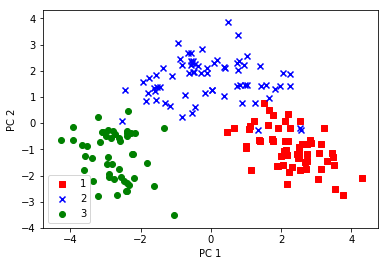

[[ 3.31675081 -1.44346263]
 [ 2.20946492  0.33339289]
 [ 2.51674015 -1.0311513 ]
 [ 3.75706561 -2.75637191]
 [ 1.00890849 -0.86983082]
 [ 3.05025392 -2.12240111]
 [ 2.44908967 -1.17485013]
 [ 2.05943687 -1.60896307]
 [ 2.5108743  -0.91807096]
 [ 2.75362819 -0.78943767]
 [ 3.47973668 -1.30233324]
 [ 1.7547529  -0.61197723]
 [ 2.11346234 -0.67570634]
 [ 3.45815682 -1.13062988]
 [ 4.31278391 -2.09597558]
 [ 2.3051882  -1.66255173]
 [ 2.17195527 -2.32730534]
 [ 1.89897118 -1.63136888]
 [ 3.54198508 -2.51834367]
 [ 2.0845222  -1.06113799]
 [ 3.12440254 -0.78689711]
 [ 1.08657007 -0.24174355]
 [ 2.53522408  0.09184062]
 [ 1.64498834  0.51627893]
 [ 1.76157587  0.31714893]
 [ 0.9900791  -0.94066734]
 [ 1.77527763 -0.68617513]
 [ 1.23542396  0.08980704]
 [ 2.18840633 -0.68956962]
 [ 2.25610898 -0.19146194]
 [ 2.50022003 -1.24083383]
 [ 2.67741105 -1.47187365]
 [ 1.62857912 -0.05270445]
 [ 1.90269086 -1.63306043]
 [ 1.41038853 -0.69793432]
 [ 1.90382623 -0.17671095]
 [ 1.38486223 -0.65863985]
 

In [39]:
# sklearn を使った主成分分析(かんたん！)

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 

# PCAをインポート
#---------------------------
from sklearn.decomposition import PCA
#---------------------------

df_wine = pd.read_csv("http://archive.ics.uci.edu/ml/machine-learning-databases/wine/wine.data", header=None)
X, y = df_wine.iloc[:, 1:].values, df_wine.iloc[:, 0].values
X = (X - X.mean(axis=0)) / X.std(axis=0)

# 主成分分析のインスタンスを生成。主成分数は2としてください。
pca = PCA(n_components=2)

# データから変換モデルを学習し、変換する。
X_pca = pca.fit_transform(X)

# 可視化
color = ["r","b","g"]
marker = ["s","x","o"]
for label, color, marker in zip(np.unique(y), color, marker):
    plt.scatter(X_pca[y==label, 0], X_pca[y==label, 1],c=color, marker=marker, label=label) 
plt.xlabel("PC 1")
plt.ylabel("PC 2")
plt.legend(loc="lower left")
plt.show()

print(X_pca) # 消さないでください。実行結果の確認に使います。

In [ ]:
3.1.9 前処理としての主成分分析

ここまで学んだことを応用して、回帰分析の前処理に主成分分析を適用します。予めデータを圧縮することで、外れ値などの外乱に強くより汎用性の高い回帰分析モデルを生成できます。

特徴変換を行う際、トレーニングデータとテストデータで違う変換行列を求めて特徴変換を行ってしまうと、変換行列が異なってしまうために特徴変換後のデータを比較することができません。標準化についても同じことが言えます。
これでは不便なことがあるので、標準化と主成分分析を行う際はトレーニングデータとテストデータで共通の基準を使います。

標準化する際は、以下のように StandardScalar クラスを用いると便利です。

from sklearn.preprocessing import StandardScaler
# 標準化のためのインスタンスを生成
sc = StandardScaler()
# トレーニングデータから変換モデルを学習し、テストデータに同じモデルを適用
X_train_std = sc.fit_transform(X_train)
X_test_std = sc.transform(X_test)
主成分分析する際は、 PCA クラスを以下のように使います。

from sklearn.decomposition import PCA
# 主成分分析のインスタンスを生成
pca = PCA(n_components=2)
# トレーニングデータから変換モデルを学習し、テストデータに同じモデルを適用
X_train_pca = pca.fit_transform(X_train_std)
X_test_pca = pca.transform(X_test_std)


復習となりますが、回帰分析は以下のように行います。

from sklearn.linear_model import LogisticRegression
# ロジスティック回帰のインスタインスを生成
lr = LogisticRegression()
# 分類モデルを学習
lr.fit(X, y)
# スコアの表示
print(lr.score(X, y))

次元削除したデータをモデルの学習に使うと、若干ではありますが一般的にモデルの学習率が低下してしまいます。


In [42]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.linear_model import LogisticRegression

df_wine = pd.read_csv("http://archive.ics.uci.edu/ml/machine-learning-databases/wine/wine.data", header=None)

X, y = df_wine.iloc[:, 1:].values, df_wine.iloc[:, 0].values
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=0)

# 標準化のためのインスタンスを生成
sc = StandardScaler()
# トレーニングデータから変換モデルを学習し、テストデータに適用
X_train_std = sc.fit_transform(X_train)
X_test_std = sc.transform(X_test)

# 主成分分析のインスタンスを生成
pca = PCA(n_components=2)
# トレーニングデータから変換モデルを学習し、テストデータに適用
X_train_pca = pca.fit_transform(X_train_std)
X_test_pca = pca.transform(X_test_std)

# ロジスティック回帰のインスタインスを生成
lr = LogisticRegression()
# 次元削減後のトレーニングデータで分類モデルを学習
lr.fit(X_train_pca, y_train)

# スコアの表示
print(lr.score(X_train_pca, y_train))
print(lr.score(X_test_pca, y_test))

0.971698113208
0.958333333333


In [ ]:
3.2.1 カーネル主成分分析

回帰分析など、機械学習の多くのアルゴリズムは線形分離できるデータが与えられることを前提としています。ただ、現実問題として線形分離することが困難なデータ、つまり非線形分離する必要があるデータがほとんどです。このセッションでは、非線形分離する必要があるデータに対処できるカーネル化されたPCA、 「カーネルPCA(kernel PCA)」 について取り上げます。

カーネルPCA ではまずはじめに、与えられたNxM（データ数x特徴の種類）のデータ X を、全く新しいNxN（データ数x特徴の種類）のデータ K に作り変えます （カーネルトリック） 。 カーネルトリックを用いると一般的に特徴の種類は多くなり（特徴量が展開され）、線形分離させやすくなります。非線形性の高いデータに対して主成分分析を用いてもうまく行かないことが知られていますが、データをカーネル行列 K に展開することで主成分分析ができるようになります。

カーネル主成分分析を適切に適応させることにより、欲しい次元分の線形分離可能な特徴量に要約したデータを得ることができます。



In [ ]:
3.2.2 カーネルトリックⅠ

まず カーネル(類似度)行列 K を計算します。以下のような行列をカーネル行列といい、全てのサンプルデータのペアごとに類似度を計算しています。NxM（データ数x特徴の種類）のデータ X のカーネル行列は、NxM（データ数x特徴の種類）になります。カーネル行列 K を、 X に代わる新たなNxM（データ数x特徴の種類）のデータと見なすことができます。

カーネル関数を実装する
# データ同士の距離の2乗（平方ユークリッド距離）を計算
M = np.sum((X - X[:, np.newaxis])**2, axis=2)
# カーネル行列を計算
K = np.exp(-gamma * X_dists)



In [ ]:
import numpy as np

np.random.seed(39)

X = np.random.rand(8,3)

# ペアごとの平方ユークリッド距離を計算
M = np.sum((X - X[:, np.newaxis])**2, axis=2)

# カーネル行列を計算
gamma=15
K = np.exp(-gamma * M)

#---------------------------
print(K.shape)
#---------------------------

print(M) # 消さないでください。実行結果の確認に使います。
print(K) # 消さないでください。実行結果の確認に使います。

In [ ]:
# 特徴変換
カーネル行列 K を元のデータ {X}X の代わりとし、 {K}K について標準的な主成分分析手法と同様に固有値分解、特徴変換などを行うと、一般的に線形分離可能なデータ X'に変換できます。もともと K は X の特徴量を展開したものですから、 K を特徴変換して得られる行列は、 X の特徴量を変換した行列として扱うことができます。

カーネル行列を作った後、主成分分析の項と同じようにカーネル行列の固有値分解を行い、変換行列を求め、カーネル行列に変換行列を掛けあわせることで線形分離可能なデータに変換できます。


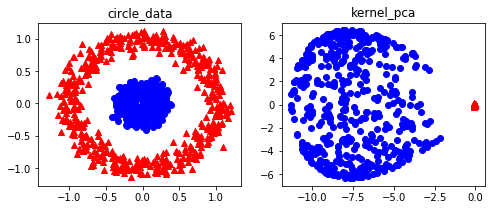

[[ 0.          0.85245704  1.23733555 ...,  4.44875623  4.35367112
   0.98261989]
 [ 0.85245704  0.          2.68971248 ...,  3.61846708  2.88128483
   0.79533273]
 [ 1.23733555  2.68971248  0.         ...,  2.23090635  2.86876086
   0.8499729 ]
 ..., 
 [ 4.44875623  3.61846708  2.23090635 ...,  0.          0.17769146
   1.30143331]
 [ 4.35367112  2.88128483  2.86876086 ...,  0.17769146  0.          1.20356293]
 [ 0.98261989  0.79533273  0.8499729  ...,  1.30143331  1.20356293  0.        ]]
[[  1.00000000e+00   2.79730074e-06   8.69921332e-09 ...,   1.04458979e-29
    4.34880435e-29   3.97012369e-07]
 [  2.79730074e-06   1.00000000e+00   3.00670394e-18 ...,   2.67790835e-24
    1.69866776e-19   6.58977758e-06]
 [  8.69921332e-09   3.00670394e-18   1.00000000e+00 ...,   2.93052378e-15
    2.04972152e-19   2.90350046e-06]
 ..., 
 [  1.04458979e-29   2.67790835e-24   2.93052378e-15 ...,   1.00000000e+00
    6.95734733e-02   3.32598623e-09]
 [  4.34880435e-29   1.69866776e-19   2.04972152e

In [44]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_circles

# データが円状に分布するデータを取得
X, y = make_circles(n_samples=1000, random_state=123, noise=0.1, factor=0.2)

# ペアごとの平方ユークリッド距離を計算
M = np.sum((X - X[:, np.newaxis])**2, axis=2)

# 対称カーネル行列を計算。γの値は15にしてください。
gamma=15
K = np.exp(-gamma * M)
    
# カーネル行列から固有対を取得。 numpy.linalg.eighはそれらを固有値の昇順で返す
eigvals, eigvecs = np.linalg.eigh(K)
# 上位k個の固有ベクトル(射影されたサンプル)を収集
W = np.c_[eigvecs[:, -1] , eigvecs[:, -2]]

# 線形分離可能なデータが得られます。
X_kpca = K.dot(W)

# 可視化
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(8,3))
ax1.scatter(X[y==0, 0], X[y==0, 1], color="r", marker="^")
ax1.scatter(X[y==1, 0], X[y==1, 1], color="b", marker="o")
ax2.scatter(X_kpca[y==0, 0], X_kpca[y==0, 1], color="r", marker="^")
ax2.scatter(X_kpca[y==1, 0], X_kpca[y==1, 1], color="b", marker="o")
ax1.set_title("circle_data")
ax2.set_title("kernel_pca")
plt.show()

print(M) # 消さないでください。実行結果の確認に使います。
print(K) # 消さないでください。実行結果の確認に使います。
print(W) # 消さないでください。実行結果の確認に使います。
print(X_kpca) # 消さないでください。実行結果の確認に使います。

In [ ]:
# sklearn をつかったカーネル主成分分析

from sklearn.decomposition import KernelPCA
# 今回使うカーネル（動径基底関数）は、 kernel="rbf" で指定できます。
kpca = KernelPCA(n_components=2, kernel="rbf", gamma=15)
X_kpca = kpca.fit_transform(X)


# サンプルデータ
from sklearn.datasets import make_moons
# 月形データを取得
X, y = make_moons(n_samples=100, random_state=123)

[[-0.19813012  0.32893502]
 [ 0.35038479  0.18363537]
 [ 0.33278344 -0.27303406]
 [-0.35861834 -0.13787481]
 [ 0.27947114  0.34646117]
 [-0.03231269  0.09992664]
 [-0.1402958   0.26393352]
 [ 0.03231269  0.09992664]
 [ 0.34107928 -0.24384492]
 [-0.11997571  0.23460267]
 [-0.36284598  0.06785758]
 [ 0.30536789  0.32022674]
 [ 0.36407185 -0.05708143]
 [ 0.23323782  0.35027498]
 [-0.36450698  0.02649036]
 [-0.19110122 -0.31758295]
 [ 0.3619725  -0.09811911]
 [-0.25930323 -0.35789694]
 [ 0.16016551  0.28967584]
 [ 0.36491625 -0.01534889]
 [-0.30089306 -0.33640228]
 [ 0.25930323 -0.35789694]
 [-0.34376065  0.21775298]
 [-0.35401236 -0.17577444]
 [-0.34107928 -0.24384492]
 [ 0.20934501 -0.33483988]
 [ 0.30089306 -0.33640228]
 [-0.21607303  0.34193845]
 [ 0.09932993  0.20228953]
 [-0.20934501 -0.33483988]
 [-0.35577988  0.14695458]
 [ 0.22683311 -0.34741261]
 [-0.3232991  -0.29841965]
 [ 0.34376065  0.21775298]
 [ 0.31265694 -0.31964198]
 [ 0.27416866 -0.35566406]
 [ 0.13245717 -0.2402938 ]
 

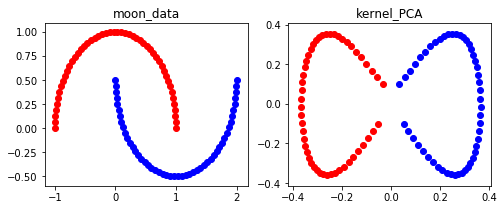

In [49]:
import numpy as np
import matplotlib.pyplot as plt

from sklearn.datasets import make_moons
# KernelPCAをインポート
#---------------------------
from sklearn.decomposition import KernelPCA
#---------------------------

# 月形データを取得
X, y = make_moons(n_samples=100, random_state=123)

# KernelPCAクラスをインスタンス化
kpca = KernelPCA(n_components=2, kernel="rbf", gamma=15)
# データXをKernelPCAを用いて変換
X_kpca = kpca.fit_transform(X)

# 可視化
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(8,3))
ax1.scatter(X[y==0, 0], X[y==0, 1], c="r")
ax1.scatter(X[y==1, 0], X[y==1, 1], c="b")
ax1.set_title("moon_data")
ax2.scatter(X_kpca[y==0, 0], X_kpca[y==0, 1], c="r")
ax2.scatter(X_kpca[y==1, 0], X_kpca[y==1, 1], c="b")
ax2.set_title("kernel_PCA")
plt.show

print(X_kpca) # 消さないでください。実行結果の確認に使います。